# Salary Categorization Analysis

## Objective

While there are many students that enter college with a fully-detailed plan about their future career path, its not uncommon to find students that are struggling with what major to choose, let alone a career. I know that when I had looked through my options of careers, I would quickly look up the highest paid careers and would work down from there. Looking back at this, knowing that I wasn't the only naive student to do this, was not a very methodical approach to my issue. Although there are many different important components of a career that caters to a person's interests, we will be looking at Undergraduate Majors and the salary expectations that are tied them. 

This project delves into the intricate relationship between Undergraduate Major and the correlated salary categorization. In this study we aim to explore:
* Which majors seem to perform the best given all the different salary categories together
* How each of those top majors differ separate facets of salary distribution
* Which majors excel in each categorization of income

Through our research we will address the above-mentioned exploration topics in order to empower an audience, possibly made up of unsure students, to make informed decisions on an important factor like salary.


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as p

## A look at the Data

Our data set has been taken from the Wall Street Journal from Payscale Inc. The raw data came from a csv with 50 different Undergraduate majors, while having 7 different attributes about that major's expected income per year. The salary attributes that are listed are Starting Median Salary, Mid-Career Salary, Percent change from Starting to Mid-Career Salary, Mid-Career 10th, 25th, 75th and 90th Percentile Salary. "Percent change from Starting to Mid-Career Salary" was a column that I was debating on getting rid of. I believed this was appropriate because I found that the percent growth from starting salary to mid-career salary is irrelevant compared to the raw salary. I ended up keeping it in because I'm sure that there will be some students out there that will find this useful.

### Data Cleaning

There was a number of things I had to do with this data to prepare it for analysis. But because this data set is derived from the Wall Street Journal, a reputable source, it was not very messy. There was no need for any removing of duplicates or fixing typos. Instead, we cleaned and manipulated the data in order to easily use it for our purposes in Python and tailor it to our objectives. This is a list of everything I've done to the data set:
* Salary Numbers Formatting: When I would insert the data into Python, it would intake the dollar amounts as string values instead of integers and would order them incorrectly as a result. This is because the original data set recorded salaries with dollar signs in Excel. I used simple functions to convert these into raw integers for a quick fix.
* Creation of Point systems: Because the original data set didn't have an attribute that would accumulate each major's performance in every single salary categorization, I've used Python in order to create a point ranking system. I will go more into detail about this below.

In [9]:
### DATA SET UP
p.options.display.float_format = '{:,}'.format
df = p.read_csv(r"C:\Users\steph\PycharmProjects\Degrees\degrees-that-pay-back.csv")

In [19]:
list(df)

['Undergraduate Major',
 'Starting Median Salary',
 'Mid-Career Median Salary',
 'Percent change from Starting to Mid-Career Salary',
 'Mid-Career 10th Percentile Salary',
 'Mid-Career 25th Percentile Salary',
 'Mid-Career 75th Percentile Salary',
 'Mid-Career 90th Percentile Salary',
 'total points',
 'new points',
 'Starting Median Salary pts',
 'Mid-Career Median Salary pts',
 'Percent change from Starting to Mid-Career Salary pts',
 'Mid-Career 10th Percentile Salary pts',
 'Mid-Career 25th Percentile Salary pts',
 'Mid-Career 75th Percentile Salary pts',
 'Mid-Career 90th Percentile Salary pts']

In [10]:
# Assigning points based on pure ranking
colnames = list(df)
colnames.pop(0)
salary_dict = {}
for attribute in colnames:
    #inserting into a map for specific salary category and ordering them
    salary_dict[attribute] = df[['Undergraduate Major', attribute]].sort_values(by=attribute, ascending = False)
    #assigning points based on position
    salary_dict[attribute]['points'] = range(len(df), 0, -1)
new_df = df
new_df['total points'] = 0
#accumulating all ranking points to a single total points column
for key in salary_dict:
    for index, row in salary_dict[key].iterrows():
        new_df.loc[df['Undergraduate Major'] == row['Undergraduate Major'], 'total points'] += row['points']
#now that we have simply mapped out the points of what gets more of whatever, we need a better system for giving out
#points in each dataframe. The problem with our current system is that a 1 point increment could be awarded for a
#100,000 advantage by one field, and a 1 point decrease by a $200 disadvantage.

# I was thinking of making a weighted point system where every salary is judged based on their weight of the sum of
# the whole entire salary total. I've decided not to do this because it creates a system where increments of salaries
# are awarded on a universal scale when it shouldnt, i.e. a small increase in starting median salary can be a lot more
# prestigious than the same increase in post-career increment.

In [11]:
# Creating new point system
#data setup
colnames2 = list(df)
update_fin = df
#making column to put new points
update_fin['new points'] = 0
#using a dictionary to store totals specifically for each income category based on new point system
salary_dict2 = {}
for income_cat in colnames:
    #creating a sum for each income category
    sum_curr = update_fin[income_cat].sum()
    #creating a key for each income category and ordering undergraduate majors by that income category
    salary_dict2[income_cat] = update_fin.sort_values(by=income_cat, ascending = False)
    #for loop that takes every undergraduate major in each income category, and assigns points based off of weight
    for index, row in salary_dict2[income_cat].iterrows():
        income_cat_pts = round(float(row[colnames2.index(income_cat)]) / float(sum_curr) * 1000, 3)
        #points added to the new points column in each entry in dictionary
        salary_dict2[income_cat].loc[salary_dict2[income_cat]['Undergraduate Major'] == row['Undergraduate Major'], 'new points'] = \
                                            income_cat_pts
        #points given by each income category specifically put back into the dataframe
        update_fin.loc[index, income_cat + " pts"] = income_cat_pts



# sums all the points gained by each attribute into their respective section in the bigger dataframe
for key in salary_dict2:
    for index, row in salary_dict2[key].iterrows():
        update_fin.loc[update_fin['Undergraduate Major'] == row['Undergraduate Major'], 'new points'] += row['new points']
update_fin = update_fin.sort_values(by='new points', ascending = False)
#round the totals to make it easier to read
update_fin['new points'] = round(update_fin['new points'], 1)

# We've now created a dataframe of our salary data that now has our new point system added, and how many points each
# income category contributes to that total 'new points' column.

In [12]:
#Question: Which Majors perform the best based on all available income categories and how well does each income
# category do in each major

update_fin_rank = update_fin.head(5).reset_index(drop=True)
first = update_fin_rank.loc[0, "Undergraduate Major"]
second = update_fin_rank.loc[1, "Undergraduate Major"]
third = update_fin_rank.loc[2, "Undergraduate Major"]
print(f"1st place is {first} with", update_fin_rank.loc[0, "new points"])
print(f"2nd place is {second} with", update_fin_rank.loc[1, "new points"])
print(f"3rd place is {third} with", update_fin_rank.loc[2, "new points"])

1st place is Chemical Engineering with 196.6
2nd place is Computer Engineering with 185.9
3rd place is Electrical Engineering with 185.8


In [15]:
top5_majors = update_fin_rank["Undergraduate Major"]
top5_majors_r = list(top5_majors)
top5_majors_r.reverse()
top5_majors_r
fin_rank_totals_r = list(update_fin_rank.loc[0:6, 'new points'])
fin_rank_totals_r.reverse()
fin_rank_totals_r

[181.1, 183.3, 185.8, 185.9, 196.6]

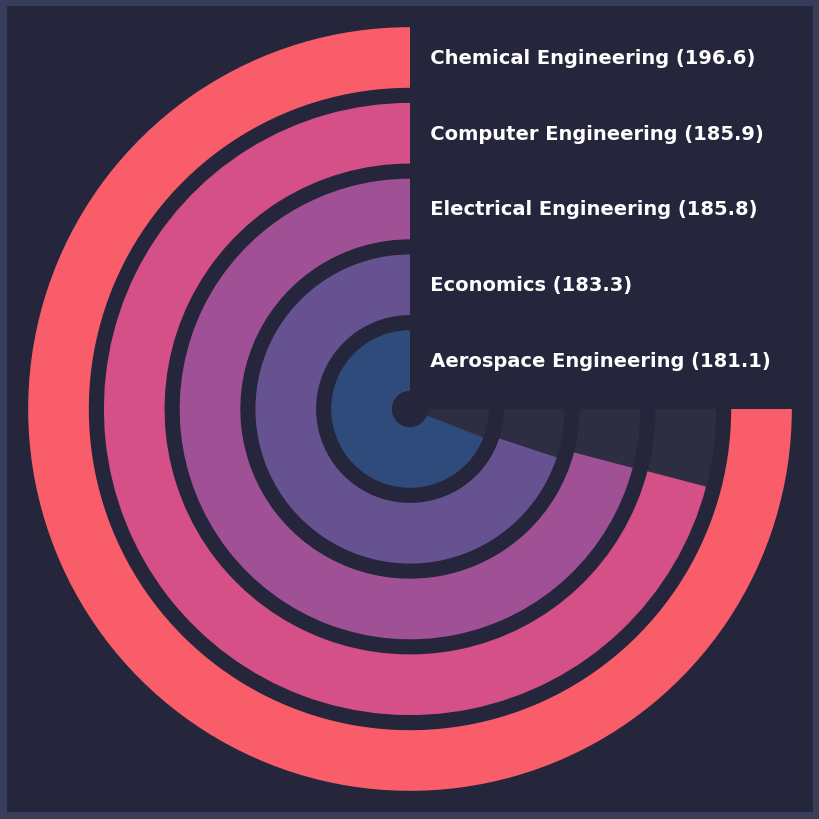

In [16]:
#radial column chart
lith_dict = {'LITH': top5_majors_r,
             'COUNT': fin_rank_totals_r}

radial_df = p.DataFrame.from_dict(lith_dict)
max_value_full_ring = max(radial_df['COUNT'])
data_len = len(radial_df)
ring_colours = ['#2f4b7c', '#665191', '#a05195','#d45087',
               '#f95d6a','#ff7c43','#ffa600']
ring_labels =  [f'   {x} ({v}) ' for x, v in zip(list(radial_df['LITH']), 
                                                 list(radial_df['COUNT']))]

fig = plt.figure(figsize=(10,10), linewidth=10,
                 edgecolor='#393d5c', 
                 facecolor='#25253c')

rect = [0.1,0.1,0.8,0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
# Start bars at top of plot
ax_polar_bg.set_theta_zero_location('N')
# Make bars go counter-clockwise. 
ax_polar_bg.set_theta_direction(1)

for i in range(data_len):
    ax_polar_bg.barh(i, max_value_full_ring*1.5*np.pi/max_value_full_ring, 
                     color='grey', 
                     alpha=0.1)
    
ax_polar_bg.axis('off')

# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2, 3, 4], 
                    labels=ring_labels, 
                    angle=0, 
                    fontsize=14, fontweight='bold',
                    color='white', verticalalignment='center')

# Loop through each entry in the dataframe and create a coloured 
# ring for each entry
for i in range(data_len):
    ax_polar.barh(i, list(radial_df['COUNT'])[i]*1.5*np.pi/max_value_full_ring, 
                  color=ring_colours[i])
    
# Hide all grid elements for the    
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=False, bottom=False, 
                   labelbottom=False, labelleft=True)

plt.show()

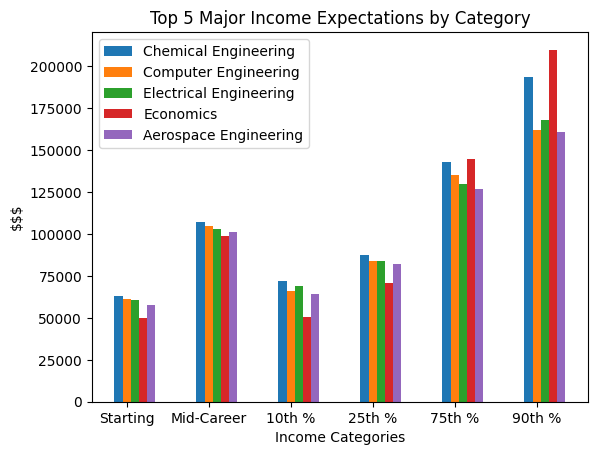

In [17]:
### BUTTERFLY CHART

colnames3 = list(colnames)
colnames3.pop(2)
colnames_small = list(['Starting', 'Mid-Career', '10th %', '25th %', '75th %', '90th %'])
X_axis = np.arange(len(colnames_small))

plt.bar(X_axis - 0.1, update_fin_rank.loc[0, colnames3], 0.1, label='Chemical Engineering')
plt.bar(X_axis, update_fin_rank.loc[1, colnames3], 0.1, label='Computer Engineering')
plt.bar(X_axis + 0.1, update_fin_rank.loc[2, colnames3], 0.1, label='Electrical Engineering')
plt.bar(X_axis + 0.2, update_fin_rank.loc[3, colnames3], 0.1, label='Economics')
plt.bar(X_axis + 0.3, update_fin_rank.loc[4, colnames3], 0.1, label='Aerospace Engineering')


plt.xticks(X_axis, colnames_small)
plt.xlabel("Income Categories")
plt.ylabel("$$$")
plt.title("Top 5 Major Income Expectations by Category")
plt.legend()
plt.show()

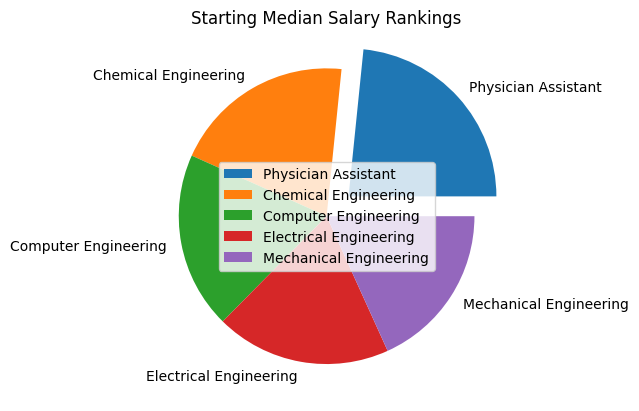

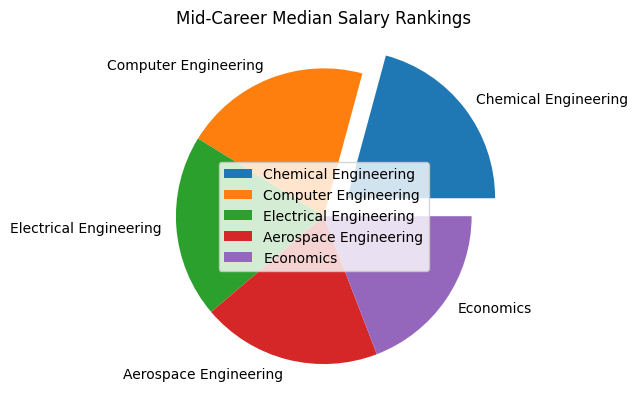

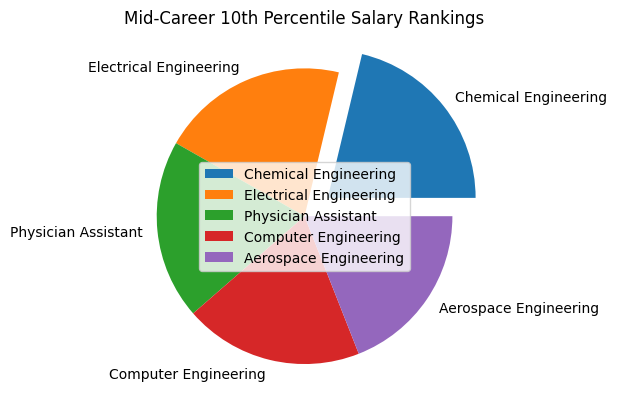

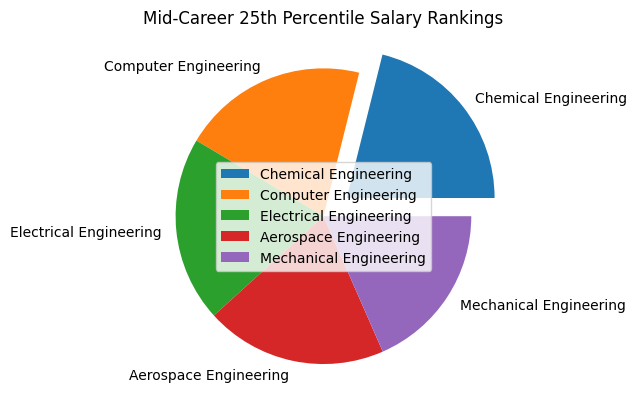

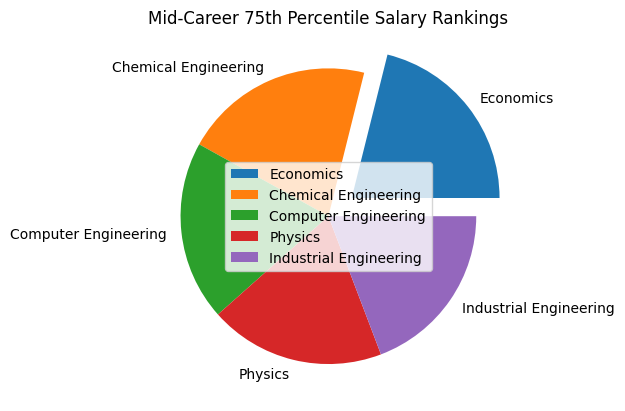

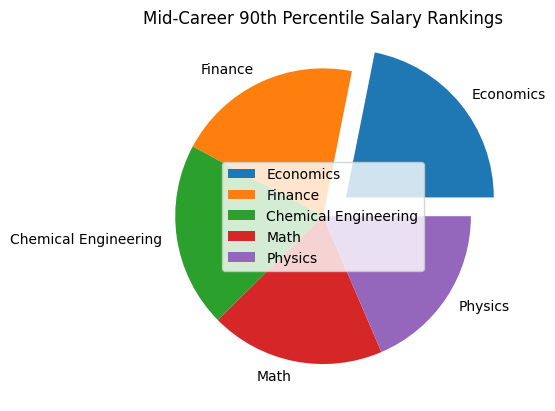

In [18]:
# Pie Charts
myexplode = [0.2, 0.0, 0.0, 0, 0]
f = 0
for categories in colnames3:
    plt.figure(f)
    income_cat = update_fin[["Undergraduate Major", categories]].sort_values(by=categories, ascending = False).head(5)
    plt.pie(income_cat[categories], labels = income_cat["Undergraduate Major"], explode = myexplode)
    plt.title(categories + " Rankings")
    plt.legend(loc = "center", markerscale = 10)
    f = f + 1

